<a href="https://colab.research.google.com/github/boomermiesterr/Sentiment-Analysis-Using-NLP/blob/main/Sentiment_Analysis_alexa_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Alexa Reviews
**bold text**
Im going to make a Sentiment analysis by Using this
Dataset :https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews/

- EDA
- Modeling
- Metrics
- Web Deployment

# import libary we need

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re
from sklearn.metrics import roc_auc_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
%pip install wordcloud

In [5]:
data = pd.read_csv('/content/amazon_alexa.tsv',delimiter='\t', quoting = 3)

print(f'data-shape:{data.shape}')


data-shape:(3150, 5)


# **EDA(Data Exploration Analysis)**

- check missing value
- fill or drop
- Unvariate Analysis
- Bivariate Analysis


In [6]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [8]:
#See the record where Verified_reviews is Null

data[data['verified_reviews'].isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [9]:
#Im decide to remove this because there are only 1 rows
data.dropna(inplace = True)

### Create A new Columns that cotains the length of the string "verified_reviews" columns

In [10]:
#Create length columns

data['length'] = data['verified_reviews'].apply(len)

In [11]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


**Now we got Length of the string as Columns**

Randomly checking  for 20 record

In [12]:
print(f"Review comment :{data.iloc[20]['verified_reviews']}")
print(f"Lenght of review :{len(data.iloc[20]['verified_reviews'])}")
print(f"length of columns value: {data.iloc[20]['length']}")

Review comment :Love the Echo and how good the music sounds playing off it. Alexa understands most commands but it is difficult at times for her to find specific playlists or songs on Spotify. She is good with Amazon Music but is lacking in other major programs.
Lenght of review :246
length of columns value: 246


In [13]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


## Analyze 'rating' column

---
this cloumn refers to the rating of the variation given by the user

In [14]:
grouped_data = data.groupby('rating').count().reset_index()
grouped_data

,rating,date,variation,verified_reviews,feedback,length
0,1,161,161,161,161,161
1,2,95,95,95,95,95
2,3,152,152,152,152,152
3,4,455,455,455,455,455
4,5,2286,2286,2286,2286,2286


In [15]:
print(f"Rating values count : \n {data['rating'].value_counts()}")

Rating values count : 
 rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


### Bar plot to visualize the total counts of each rating

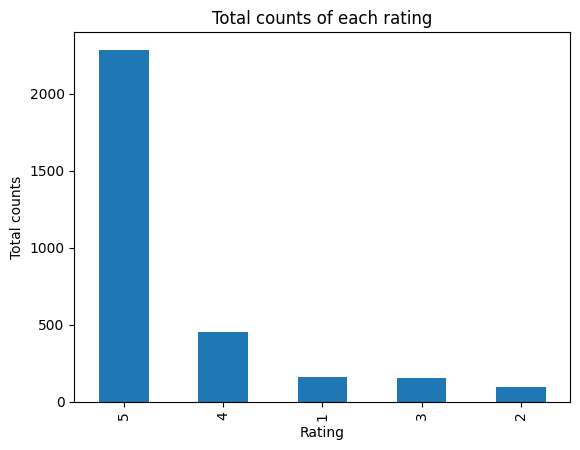

In [16]:
data['rating'].value_counts().plot(kind ='bar')
plt.xlabel('Rating')
plt.ylabel('Total counts')
plt.title('Total counts of each rating')
plt.show()

so that we can see the rating = 5 is the most  

### Rating values count as a Percentage

In [17]:
print(f"Rating values count as Percentage : \n {data['rating'].value_counts()/data.shape[0]*100,2}")

Rating values count as Percentage : 
 (rating
5    72.594474
4    14.449031
1     5.112734
3     4.826929
2     3.016831
Name: count, dtype: float64, 2)


NameError: name 'fig' is not defined

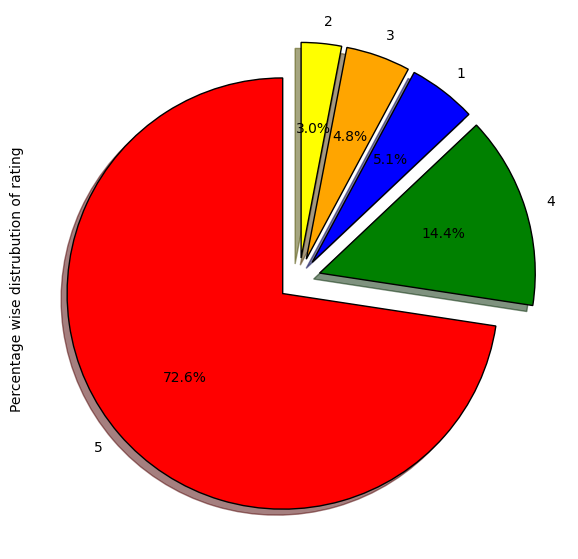

In [18]:
ig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

## Analyzing 'feedback' column

---
This column refers to the feedback of the verified review

we defind
*   0 = Negative class  | rating = 1,2
*   0 = Positive class  | rating = 3,4,5
  




In [19]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [20]:
#Extracting the 'verified_reviews' value for one record with feedback = 0
review_0 = data[data['feedback'] == 0].iloc[3]['verified_reviews']
review_0

'"Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working?"'

In [21]:
#Extracting the 'verified_reviews' value for one record with feedback = 1
review_1 = data[data['feedback'] == 1].iloc[3]['verified_reviews']
review_1

'"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."'

plot a bar to see what different between class 1 and  0

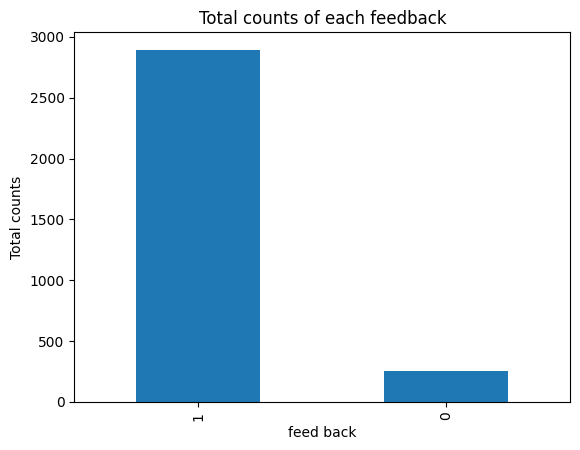

In [22]:
data['feedback'].value_counts().plot(kind = 'bar')
plt.xlabel('feed back')
plt.ylabel('Total counts')
plt.title('Total counts of each feedback')
plt.show()

In [23]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


### Feedback distribution

- 91.87% reviews are positive
- 8.13% reviews are negative

<Axes: ylabel='Percentage wise distrubution of feedback'>

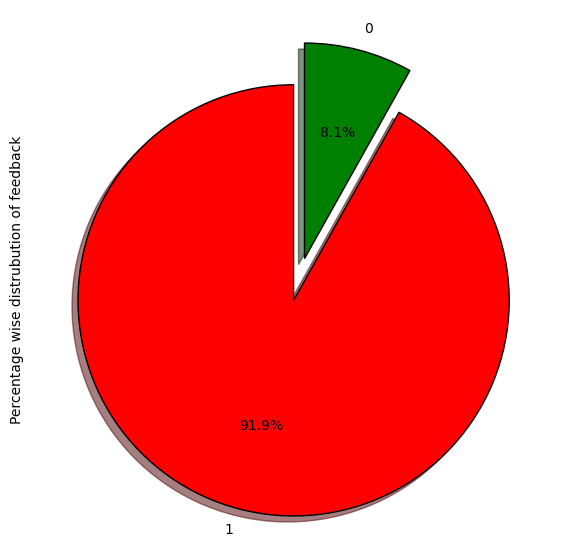

In [24]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

## Analyze the Variation column

---
his column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.


In [25]:
#Distinct values of 'variation' and its count
print(f"Variation of data: /n {data['variation'].value_counts()}")

Variation of data: /n variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


### Bar graph to visualize the total counts of each variation

<Axes: xlabel='variation'>

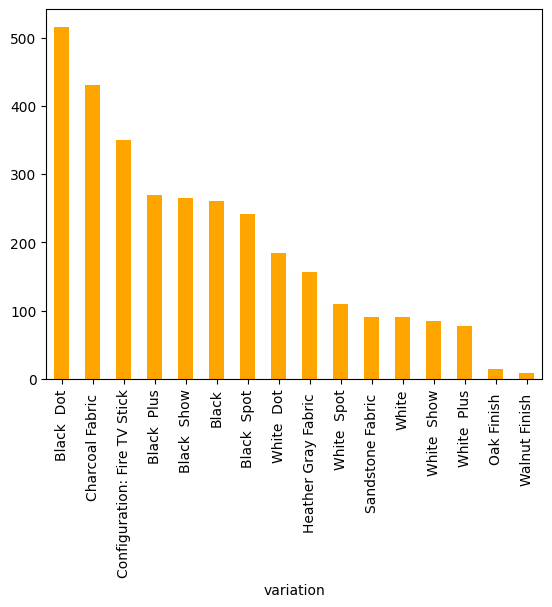

In [26]:
#Bar graph to visualize the total counts of each variation
data['variation'].value_counts().plot.bar(color = 'Orange')

In [27]:
#Distinct values of 'variation' and its count as Percentage
print(f'Variation type as Percentage :{round(data["variation"].value_counts()/data.shape[0]*100,2)}')

Variation type as Percentage :variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [28]:
df_group = data.groupby('variation')['rating'].mean()
df_group

,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


###Mean rating according Variations

Text(0, 0.5, 'Rating Mean')

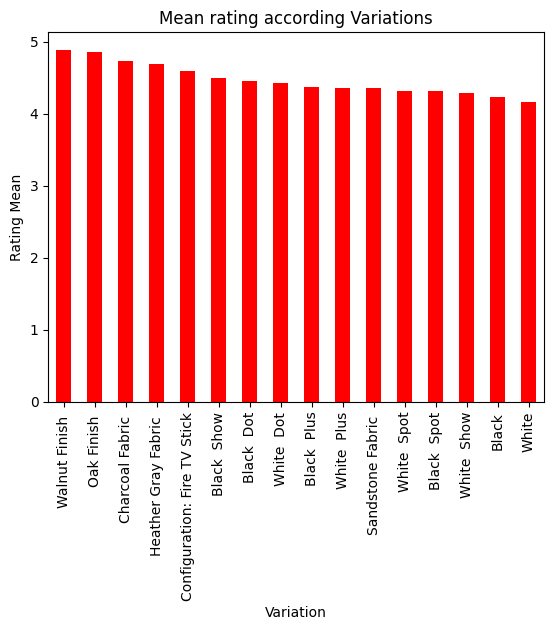

In [29]:
#Mean rating according Variations
df_group.sort_values(ascending = False).plot.bar(color = 'red')
plt.title('Mean rating according Variations')
plt.xlabel('Variation')
plt.ylabel('Rating Mean')

## Analyzing 'verified_reviews' column

---


This column contains the textual review given by the user for a variation for the product.

In [30]:
data['length'].describe()

,length
count,3149.000000
mean,132.714513
std,182.541531
min,1.000000
25%,30.000000
50%,74.000000
75%,166.000000
max,2853.000000


[Text(0.5, 1.0, 'Distribution of length of review ')]

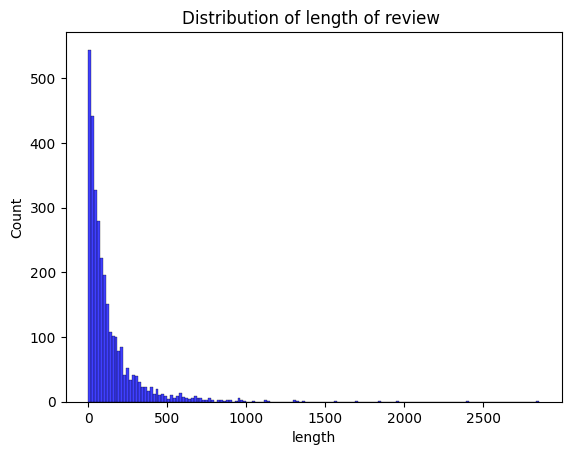

In [31]:
#create a histpot
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

### Distibution of feedback = 0

Text(0.5, 1.0, 'Distribution of length of review for feedback = 0')

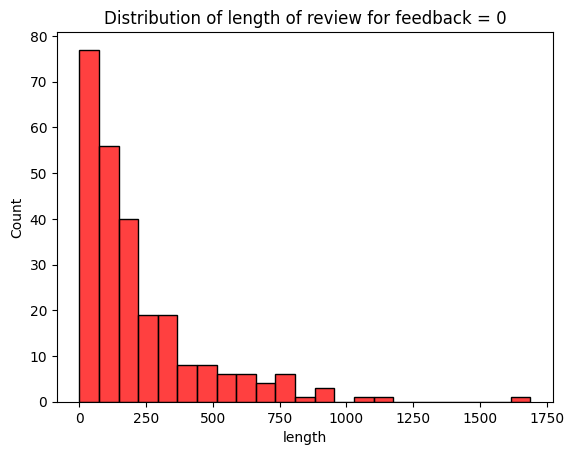

In [32]:
feedback0 = data[data['feedback'] == 0]['length']

#plot a histogram
sns.histplot(feedback0,color = 'red')
plt.title('Distribution of length of review for feedback = 0')

Summary
- Most reviews are very short. (e.g. express dissatisfaction in a concise manner, meaning "Bad product" or "Not working")
- The number of reviews decreases as more and more are considered. Most often, feedback givers don't write long reviews.

### Distibution of feedback = 0

Text(0.5, 1.0, 'Distribution of length of review for feedback = 1')

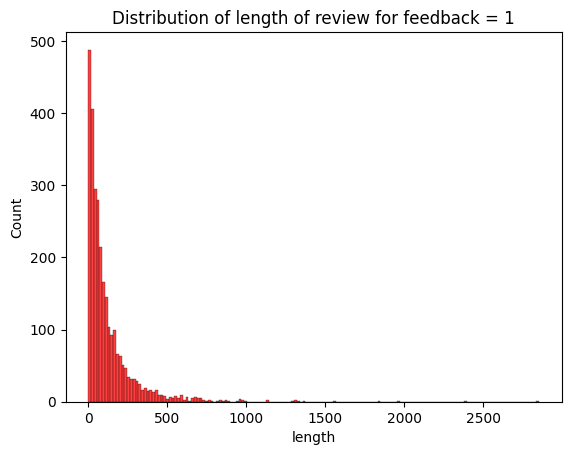

In [33]:
feedback1 = data[data['feedback'] == 1]['length']

#plot a histogram
sns.histplot(feedback1,color = 'red')
plt.title('Distribution of length of review for feedback = 1')

Summary

Right-Skewed Distribution:

The graph exhibits a right-skewed distribution, similar to the graph for feedback = 0. This indicates that the majority of users prefer writing shorter reviews.

### Lengthwise mean rating

Text(0, 0.5, 'string length')

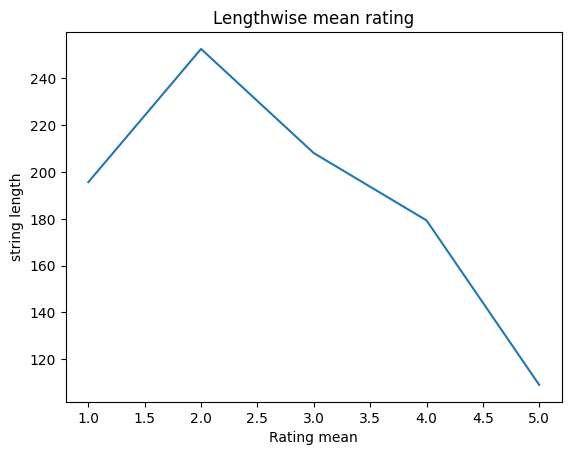

In [34]:
data.groupby('rating')['length'].mean().plot()
plt.title('Lengthwise mean rating')
plt.xlabel('Rating mean')
plt.ylabel('string length')

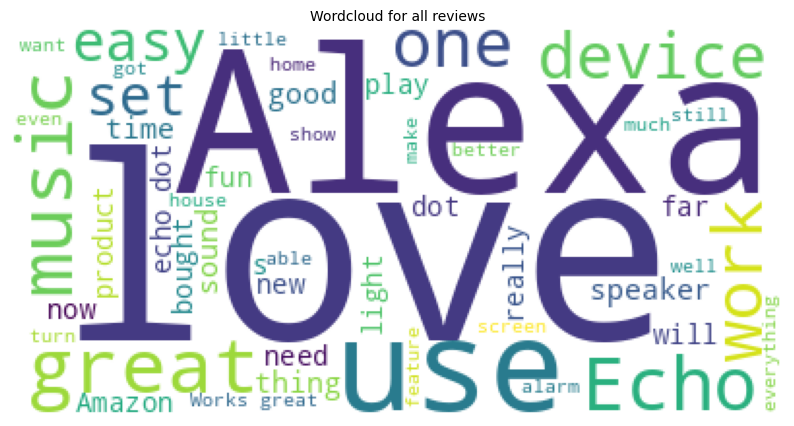

In [35]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)

# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

### find the unique text each group 1,0

In [36]:
neg_reviews = " ".join([review for review in data['verified_reviews'][data['feedback'] == 0]])
neg_reviews = neg_reviews.lower().split()
pos_reviews = " ".join([review for review in data['verified_reviews'][data['feedback'] == 1]])
pos_reviews = pos_reviews.lower().split()

unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

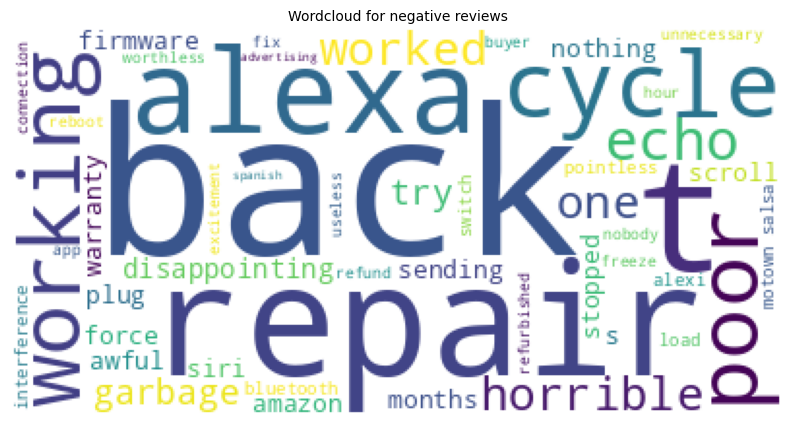

In [37]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

Negative words can be seen in the above word cloud - garbage, pointless, poor, horrible, repair etc

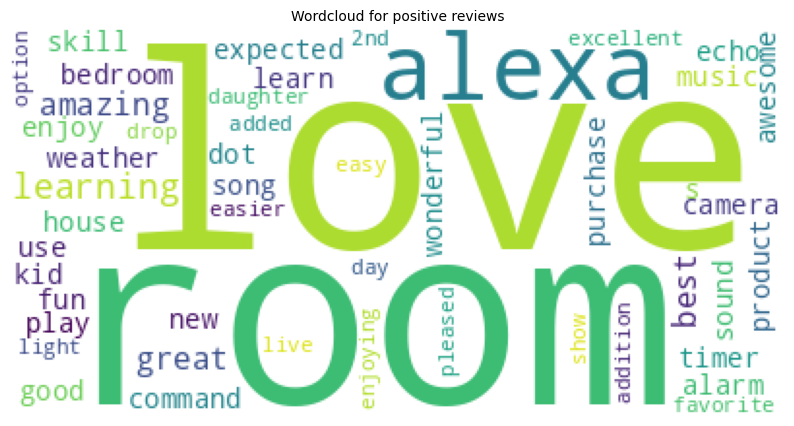

In [38]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great etc

# Preprocessing and Modelling

To build the corpus from the 'verified_reviews' we perform the following -

- Replace any non alphabet characters with a space
- Covert to lower case and split into words
- Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [39]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

Using Count Vectorizer to create bag of words

In [40]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [42]:
import os
import pickle

# Ensure the directory exists
os.makedirs('Models', exist_ok=True)

# Save the CountVectorizer
with open('Models/countVectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)


Checking the shape of X and y

In [43]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


## Splitting data to train set and test set 70% and 30%

In [44]:
X_train , X_test ,y_train , y_test = train_test_split(X,y, test_size = 0.3 , random_state = 15)

check Shape of X_train , X_test ,y_train , y_test

In [45]:
split = [X_train , X_test ,y_train , y_test]

for i in split:
  print(i.shape)

(2204, 2500)
(945, 2500)
(2204,)
(945,)


In [46]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


## Sccale X_train , X_test between 0 and 1

In [47]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [73]:
#save scaler model
with open('Models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# **Approach Model**[link text](https://)

## Random Forest

In [48]:
#fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

### Accuracy of the model

In [49]:
train_acc = model_rf.score(X_train_scl,y_train)
test_acc = model_rf.score(X_test_scl,y_test)

print(f'Train accuracy:{train_acc} \n Test accuracy:{test_acc}')

Train accuracy:0.9945553539019963 
 Test accuracy:0.9417989417989417


as we can see the Train accuracy = 0.99 we assume the model work perfectly for train but Test accuracy is lower by 0.05 it is a good sign the model is not Overfitting

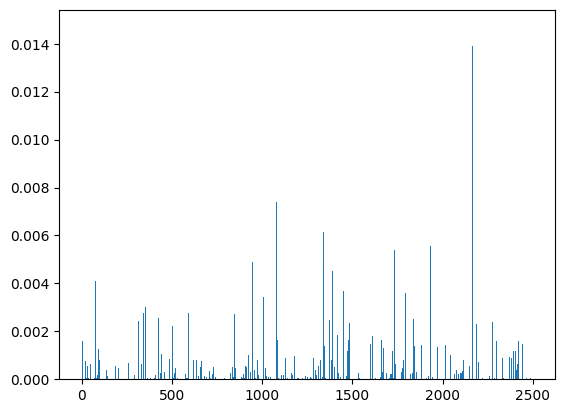

In [50]:
#Find feature importance
feature_importances = model_rf.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.show()


### prediction on test set

In [51]:
y_pred = model_rf.predict(X_test_scl)

### Confusion Matri

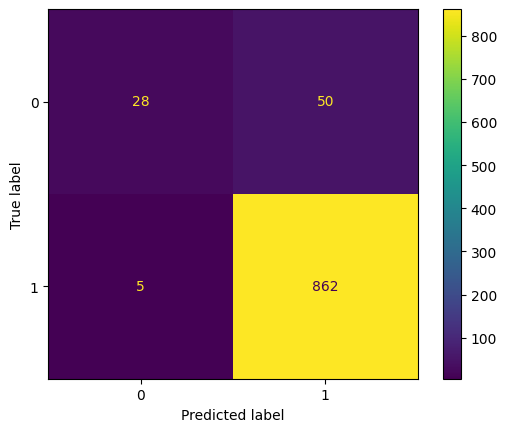

In [52]:
cm = confusion_matrix(y_test,y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

- True Negative (33):
The number of instances where the model predicted class 0 and the actual class is also 0.

- False Positive (45):
The number of instances where the model predicted class 1 but the actual class is 0 (an error).

- False Negative (9):
The number of instances where the model predicted class 0 but the actual class is 1 (an error).

- True Positive (858):
The number of instances where the model predicted class 1 and the actual class is also 1.

### AUC-ROC

In [56]:
#perform auc roc
y_prob = model_rf.predict_proba(X_test_scl)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.92


model work perfectly AUC-ROC = 0.91 is a High Score to identify 2 classes.

K fold cross-validation

In [57]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9323961332784861
Standard Variance : 0.008484148934832625


Applying grid search to get the optimal parameters on random forest

In [58]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [59]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [60]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 300}


In [61]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_pred))

Cross validation mean accuracy on train set : 96.81828493647913
Cross validation mean accuracy on test set : 92.15063520871144
Accuracy score for test set : 0.9417989417989417


## **XgBoost**

In [62]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Accuracy of the model

In [63]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


In [74]:
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [64]:
y_preds = model_xgb.predict(X_test)

### Confusion Matrix

In [65]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


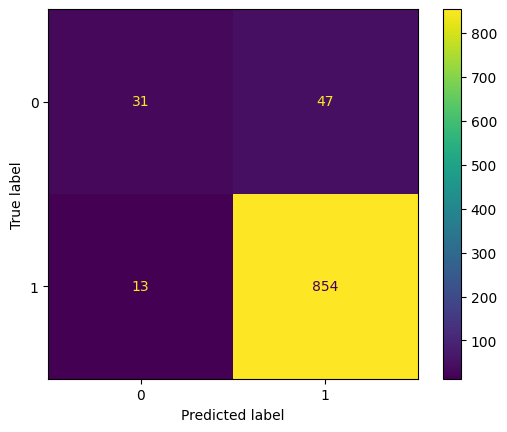

In [66]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model_lg = LogisticRegression()
model_lg.fit(X_train_scl, y_train)

LogisticRegression()

In [77]:
#show accuracy
print("Training Accuracy :", model_lg.score(X_train_scl, y_train))
print("Testing Accuracy :", model_lg.score(X_test_scl, y_test))

Training Accuracy : 0.9637023593466425
Testing Accuracy : 0.9396825396825397


In [79]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_preds)

# แสดงผล confusion matrix
print("Confusion Matrix:")
print(cm)

# รายงานเพิ่มเติมเกี่ยวกับโมเดล
print("\nClassification Report:")
print(classification_report(y_test, y_preds))

Confusion Matrix:
[[ 39  39]
 [ 91 776]]

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.50      0.38        78
           1       0.95      0.90      0.92       867

    accuracy                           0.86       945
   macro avg       0.63      0.70      0.65       945
weighted avg       0.90      0.86      0.88       945



In [80]:
#save moodel
pickle.dump(model_lg, open('Models/logistic_model.pkl', 'wb'))


## Decision Tree Classifier

In [67]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [68]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9259259259259259


In [69]:
y_preds = model_dt.predict(X_test)

In [70]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 39  39]
 [ 91 776]]


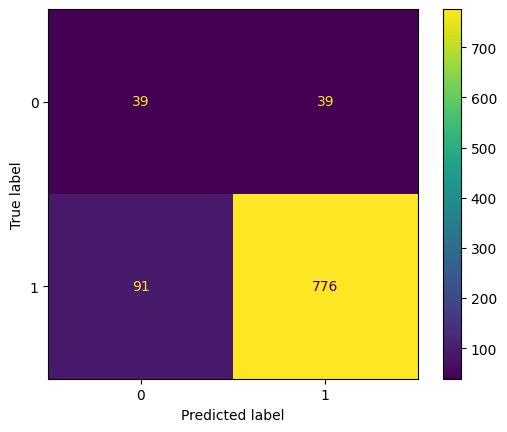

In [71]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

# Summary

---

in the End Im choosing Xgboost model because is the best Result comparing to Whole Moldel i used.